# Statement of the problem
Our task is to come up with a sign language recognition model using Computer Vision.The model then can be used by the  computer in
recognising sign language images from recorded videos or on live videos.

In [1]:
# importing the necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import transforms  as transforms
from torch.utils.data import Dataset,DataLoader

In [2]:
#loading in our data 
train_data = pd.read_csv("C:\Datasets\sign_minist\sign_mnist_train.csv").head(1000)
test_data = pd.read_csv("C:\Datasets\sign_minist\sign_mnist_test.csv").head(1000)

In [3]:
# checking out the data 
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# lets see how many different classes we are supposed to predict our images
print(f"There are a total of {train_data['label'].nunique()} images classes in our dataset")

There are a total of 24 images classes in our dataset


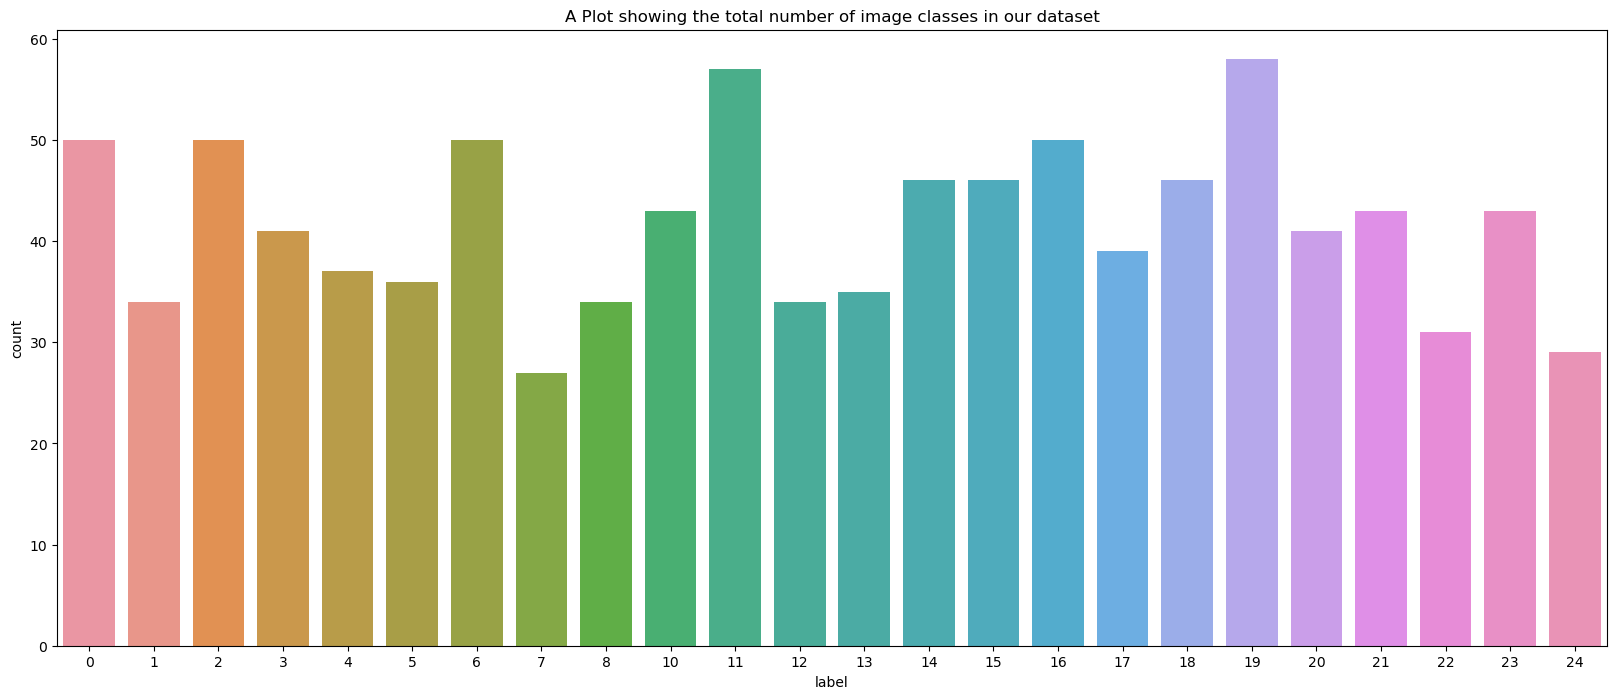

In [5]:
plt.figure(figsize=(20,8))
plt.xlabel("Classes")
plt.ylabel("Total Number ")
sns.countplot(x=train_data['label'])
plt.title("A Plot showing the total number of image classes in our dataset")
plt.show()

In [6]:
# the shape of our training data and testing data 
print(f"Our training data shape is {train_data.shape}")
print(f"Our testing  data shape is {test_data.shape}")

Our training data shape is (1000, 785)
Our testing  data shape is (1000, 785)


In [7]:
# Separating features such that we have labels on their own
X_train = train_data.drop(['label'],axis=1).values
X_test = test_data.drop(['label'],axis=1).values
y_train = train_data['label'].values
y_test = test_data['label'].values

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)

<Figure size 1500x500 with 0 Axes>

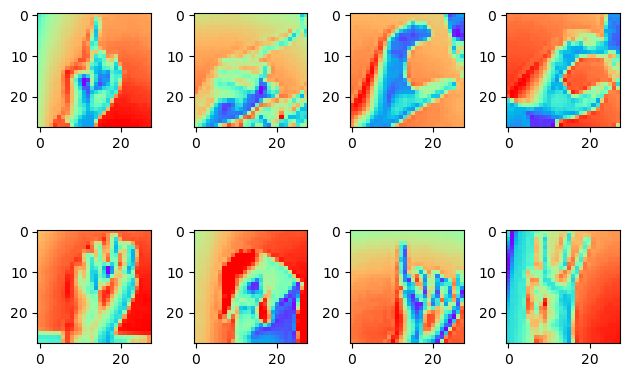

In [10]:
# Plot some 16 samples
f =plt.figure(figsize=(15,5))
f,graph = plt.subplots(2,4)
f.set_size_indices = (14,5)
z = 0
for i in range(2):
    for k in range(4):
        graph[i][k].imshow(X_train[z].reshape(28,28),cmap='rainbow')
        graph[i][k].grid(False)
        z+=1
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

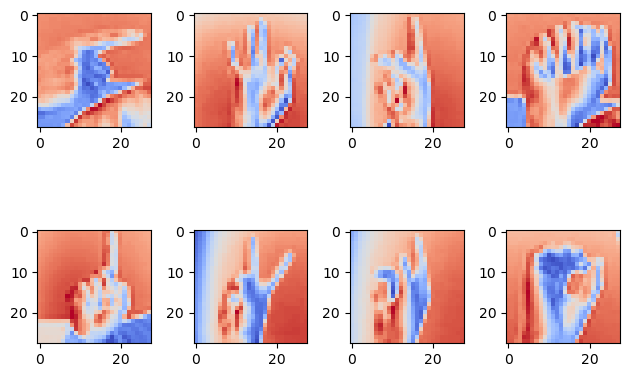

In [11]:
# For our testing images 
f =plt.figure(figsize=(15,5))
f,graph = plt.subplots(2,4)
f.set_size_indices = (14,5)
z = 0
for i in range(2):
    for k in range(4):
        graph[i][k].imshow(X_test[z].reshape(28,28),cmap='coolwarm')
        graph[i][k].grid(False)
        z+=1
plt.tight_layout()
plt.show()

# DEEP LEARNING : Pytorch Computer Vision

In [12]:
# Convert all data into tensor data type 
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [13]:
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [14]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

In [15]:
print(f"There are a total of :{len(train_loader)}|training batches")
print(f"There are a total of :{len(test_loader)}|testing batches")

There are a total of :16|training batches
There are a total of :16|testing batches


# CONVOLUTIONAL NEURAL NETWORK 

In [16]:
import torch.optim as optim
import torch.nn.functional as F

In [68]:
class HandGesture(nn.Module):
    def __init__(self,input_dim=1,hidden_dim=10,output_dim=24):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.dropout = nn.Dropout(p=0.3)
        self.convblock1 = nn.Sequential(nn.Conv2d(in_channels= input_dim,out_channels = hidden_dim,kernel_size=3,padding=1 ,stride=1),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels=hidden_dim,out_channels =hidden_dim,kernel_size=3,padding=1,stride=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=3))
        self.convblock2 = nn.Sequential(nn.Conv2d(in_channels = hidden_dim,out_channels = hidden_dim,kernel_size=3,padding=1,stride=1),
                                        nn.ReLU(),nn.Conv2d(in_channels=hidden_dim,out_channels=hidden_dim,kernel_size=3,padding=1,stride=1),
                                        nn.MaxPool2d(kernel_size=3))
        self.output_layer = nn.Sequential(nn.Flatten(),nn.Linear(hidden_dim*3*3,output_dim))
        
    def forward(self,x):
        #x = F.relu(x)
        x = self.convblock1(x)
        print(f"Output shape of {x.shape}")
        x = self.convblock2(x)
        print(f"Output shape of {x.shape}")
        x = x.unsqueeze(0)
        x = self.output_layer(x)
        return x

In [69]:
model = HandGesture()

In [70]:
#model.forward(X_train[:2]) # random iteration in my data

# MODEL TRAINING ::

In [71]:
import torchmetrics
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.BCELoss()
accuracy  = torchmetrics.Accuracy

In [72]:
import random
random_image = random.choice(X_test)
prediction = model(random_image)
random_prediction = model.forward(random_image)

Output shape of torch.Size([10, 9, 9])
Output shape of torch.Size([10, 3, 3])
Output shape of torch.Size([10, 9, 9])
Output shape of torch.Size([10, 3, 3])


In [73]:
random_prediction.shape

torch.Size([1, 24])

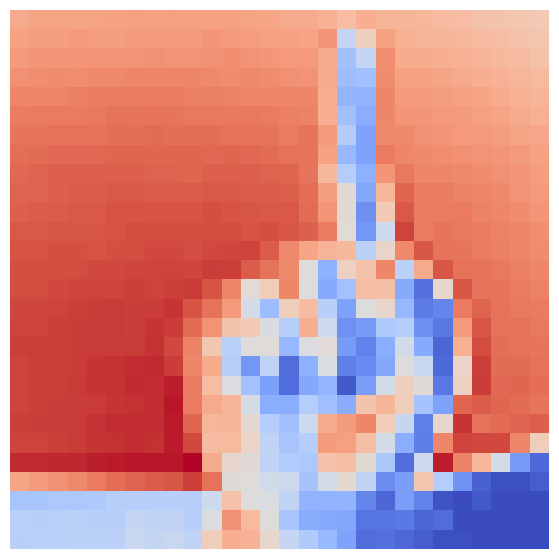

In [86]:
# Plotting random image prediction
with torch.inference_mode():
    fig = plt.figure(figsize=(10,7))
    plt.imshow(random_image.squeeze(),cmap='coolwarm')
    plt.axis(False)
    plt.show()

# TRAINING AND TESTING LOOP :

In [ ]:
epochs = 100 
for epoch in range(epochs):
    for batch,X,y in enumerate(train_loader):
        y_pred = model.forward(X_train)
        loss = criterion(y_pred,y_train)
        training_accuracy = accuracy(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = model.forward(X_test)
            testing_loss = criterion(y_test,y_pred)
            testing_accuracy = accuracy(y_test,y_pred)
            if epoch% 10  == 0 :
                    print(f"Epoch{epoch}|training loss{loss}|testing loss{testing_loss}|training_accuracy{training_accuracy}|testing_accuracy{testing_accuracy}")


        